In [1]:
#匯入模組
from sklearn import cluster, metrics
import os
import time
import collections

In [2]:
#讀取資料
original_data = 'drive/My Drive/Yuntech109_1/DataMining/Homework03/mini_newsgroups'
#取得文件夾下的所有文件名稱
categories = os.listdir(original_data)

In [3]:
#檢視文件取得的名字
categories

['talk.politics.guns',
 'soc.religion.christian',
 'talk.politics.mideast',
 'sci.space',
 'talk.politics.misc',
 'sci.med',
 'talk.religion.misc',
 'sci.crypt',
 'rec.sport.hockey',
 'sci.electronics',
 'misc.forsale',
 'comp.os.ms-windows.misc',
 'alt.atheism',
 'rec.motorcycles',
 'comp.sys.mac.hardware',
 'comp.graphics',
 'comp.sys.ibm.pc.hardware',
 'rec.autos',
 'rec.sport.baseball',
 'comp.windows.x']

In [4]:
#命名
x = []
y = []

In [5]:
#取得要分群的資料(x)
#原始分群的結果(y)
for categories_name in categories:
  path = original_data + '/' + categories_name
  files = os.listdir(path)

  for file in files:
    if not (os.path.isdir(file)):
      f = open(path + '/' + file, encoding='latin-1')
      name = f.read()
      y.append(categories_name)
      x.append(name)

In [6]:
#檢視資料
print(x)
print(y)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [7]:
#文字出現的次數
from sklearn.feature_extraction.text import CountVectorizer
count_x=CountVectorizer()
x_counts=count_x.fit_transform(x)

In [8]:
#文字轉為向量
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer()
x_tfidf=tfidf_transformer.fit_transform(x_counts)

In [9]:
#Hierarchical分群
#查看分幾群會得到最佳的purity
ks = range(2, 21)
for k in ks:
    KKSTticks=time.clock()
    hclust = cluster.AgglomerativeClustering(linkage = 'average', affinity = 'euclidean', n_clusters = k)
    hclust.fit(x_tfidf.toarray())
    cluster_labels = hclust.labels_
    #計算純度
    def purity(result,label):    
        total_num = len(label)
        cluster_counter = collections.Counter(result)
        original_counter = collections.Counter(label)
        t=[]
        for k in cluster_counter:
            p_k = []
            for j in original_counter:
                 count = 0
                 for i in range(len(result)):
                     if result[i] == k and label[i] == j: # 求交集
                         count += 1
                 p_k.append(count)
            temp_t = max(p_k)
            t.append(temp_t)
        return sum(t)/total_num
    #計算每群的績效
    print('Hierarchical績效：',k,'群,')
    KKEDticks=time.clock()
    print('Hierarchical所花費時間：',KKEDticks-KKSTticks)
    print('Hierarchical純度：',purity(cluster_labels,y))

Hierarchical績效： 2 群,
Hierarchical所花費時間： 106.322635
Hierarchical純度： 0.0505
Hierarchical績效： 3 群,
Hierarchical所花費時間： 104.235951
Hierarchical純度： 0.053
Hierarchical績效： 4 群,
Hierarchical所花費時間： 104.274516
Hierarchical純度： 0.053
Hierarchical績效： 5 群,
Hierarchical所花費時間： 105.13561999999996
Hierarchical純度： 0.0535
Hierarchical績效： 6 群,
Hierarchical所花費時間： 104.44781200000006
Hierarchical純度： 0.054
Hierarchical績效： 7 群,
Hierarchical所花費時間： 104.28458899999998
Hierarchical純度： 0.0545
Hierarchical績效： 8 群,
Hierarchical所花費時間： 104.47084799999993
Hierarchical純度： 0.055
Hierarchical績效： 9 群,
Hierarchical所花費時間： 104.14672699999994
Hierarchical純度： 0.056
Hierarchical績效： 10 群,
Hierarchical所花費時間： 104.10911799999997
Hierarchical純度： 0.0565
Hierarchical績效： 11 群,
Hierarchical所花費時間： 105.03022800000008
Hierarchical純度： 0.0575
Hierarchical績效： 12 群,
Hierarchical所花費時間： 104.3873450000001
Hierarchical純度： 0.058
Hierarchical績效： 13 群,
Hierarchical所花費時間： 104.359958
Hierarchical純度： 0.059
Hierarchical績效： 14 群,
Hierarchical所花費時間： 104.7813650

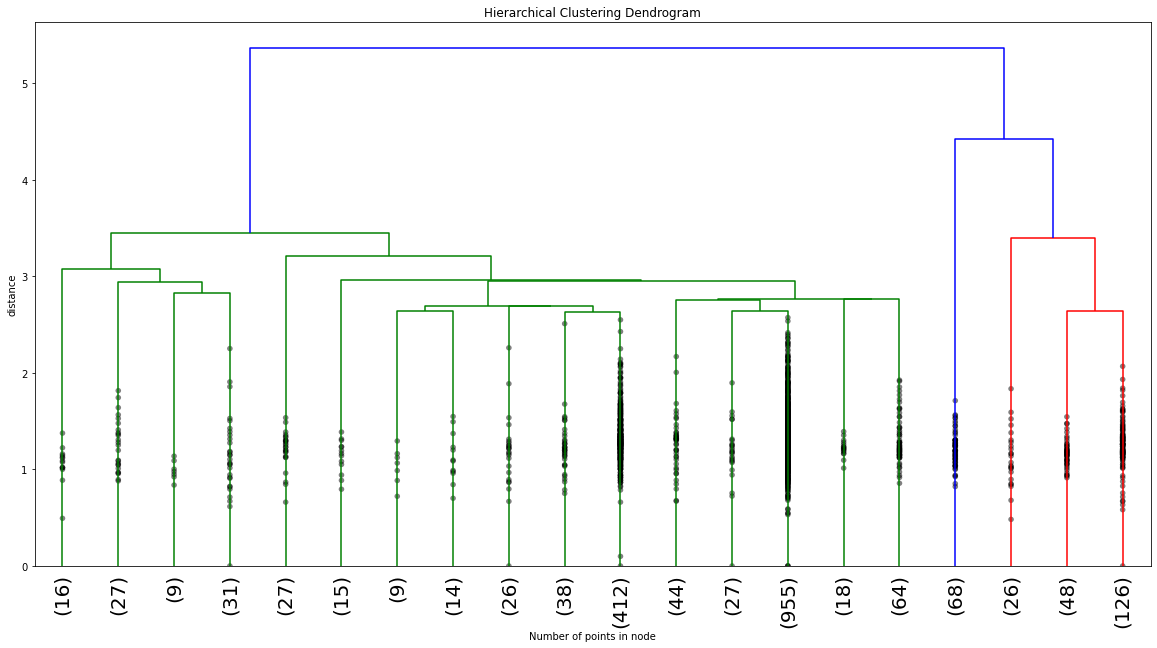

In [10]:
#繪圖 
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from matplotlib import pyplot as plt
import numpy as np
X = np.array(x_tfidf.toarray())
Z = linkage(X, 'ward')
f = fcluster(Z,20,'distance')
fig = plt.figure(figsize=(20,10))
dn = dendrogram(Z,p=20, truncate_mode='lastp', leaf_rotation=90., leaf_font_size=20., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel("Number of points in node")
plt.ylabel("distance")
plt.show() 